## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Stakeholders:
Homeowners in the King County area

Our Recommendations will provide: 
Homeowners with guidance on home renovation projects (e.g. converting half bath to full bath or adding garage/patio) that could potentially enhance the value of their homes and estimate the average increase in sales price.

In [73]:
# Import tools and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.graphics import regressionplots
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.metrics import r2_score

In [74]:
# Import main dataframe
df = pd.read_csv('data/kc_house_data.csv')

# BEGIN DATA CLEANING

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [76]:
# Clean data by dropping columns deemed unncessary

df_clean = df.drop(['id', 'date', 'view', 'condition', 'heat_source', 'sewer_system',  'sqft_above', 'sqft_basement', 'yr_renovated', 'address', 'lat', 'long'], axis=1)

id - singular identifier, not related to price

date - 

view - mostly NONE values so deemed not useful

condition - too similar to grade while being less detailed

heat_source

sewer_system

sqft_above

sqft_basement

yr_renovated

address

lat

long

In [77]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,7 Average,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,7 Average,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,7 Average,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,9 Better,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,7 Average,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,8 Good,0,210,1921
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,7 Average,0,520,2011
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,7 Average,240,110,1995
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,8 Good,480,100,2006


In [78]:
# Convert string values to integers

df_clean['waterfront'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['greenbelt'].replace(['NO','YES'], [0,1], inplace = True)
df_clean['nuisance'].replace(['NO','YES'], [0,1], inplace = True)

In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30155 non-null  float64
 1   bedrooms     30155 non-null  int64  
 2   bathrooms    30155 non-null  float64
 3   sqft_living  30155 non-null  int64  
 4   sqft_lot     30155 non-null  int64  
 5   floors       30155 non-null  float64
 6   waterfront   30155 non-null  int64  
 7   greenbelt    30155 non-null  int64  
 8   nuisance     30155 non-null  int64  
 9   grade        30155 non-null  object 
 10  sqft_garage  30155 non-null  int64  
 11  sqft_patio   30155 non-null  int64  
 12  yr_built     30155 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 3.0+ MB


In [80]:
# Check non-numeric values

df_clean['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [81]:
# Extract numeric values from 'Grade' column and convert to integers

df_clean['grade'] = df_clean['grade'].str[:2].astype(np.int64)

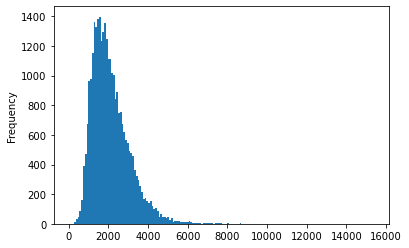

In [82]:
binvar = np.sqrt(df.sqft_living.count())
df_clean['sqft_living'].plot(kind = 'hist', bins = int(binvar));

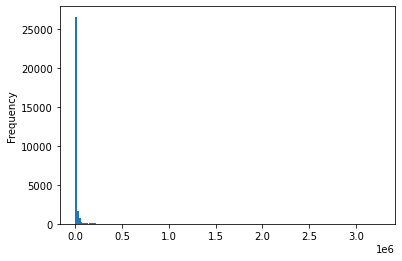

In [83]:
df_clean['sqft_lot'].plot(kind = 'hist', bins = int(binvar));

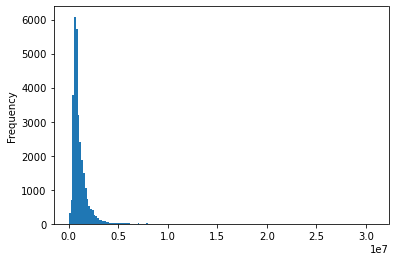

In [84]:
df_clean['price'].plot(kind = 'hist', bins = int(binvar));

In [85]:
# Removing top 1% of square footage and top 10% of price to reduce outliers

#df_clean = df_clean[df_clean['sqft_living'] < df_clean['sqft_living'].quantile(0.99)]
#df_clean = df_clean[df_clean['sqft_lot'] < df_clean['sqft_lot'].quantile(0.99)]
#df_clean = df_clean[df_clean['price'] < df_clean['price'].quantile(0.90)]

In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        30155 non-null  float64
 1   bedrooms     30155 non-null  int64  
 2   bathrooms    30155 non-null  float64
 3   sqft_living  30155 non-null  int64  
 4   sqft_lot     30155 non-null  int64  
 5   floors       30155 non-null  float64
 6   waterfront   30155 non-null  int64  
 7   greenbelt    30155 non-null  int64  
 8   nuisance     30155 non-null  int64  
 9   grade        30155 non-null  int64  
 10  sqft_garage  30155 non-null  int64  
 11  sqft_patio   30155 non-null  int64  
 12  yr_built     30155 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 3.0 MB


In [87]:
df_clean.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,7,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,7,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,7,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,9,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,0,0,1,7,550,30,2012


# END DATA CLEANING

## FINDING THE MOST CORRELATED VARIABLE

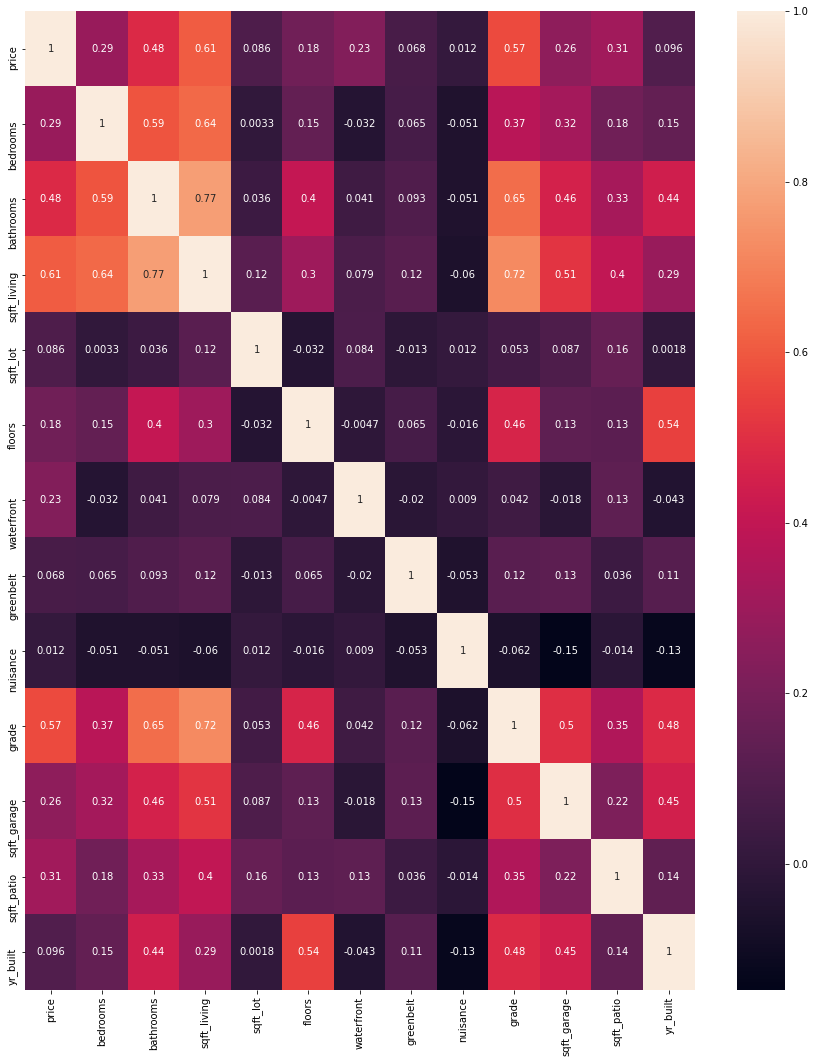

In [88]:
# Correlation heatmap for intial cleansed dataset

fig, ax = plt.subplots(figsize=(15, 18))

sns.heatmap(df_clean.corr(), annot=True);

In [89]:
df_clean.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built
price,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.232250,0.068256,0.011547,0.565263,0.264169,0.313409,0.096013
bedrooms,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,-0.032372,0.064844,-0.050826,0.374764,0.319441,0.183439,0.146191
bathrooms,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.040924,0.093470,-0.050673,0.647784,0.457022,0.327551,0.443648
sqft_living,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.078798,0.115545,-0.059699,0.721359,0.511740,0.396030,0.291694
sqft_lot,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.083654,-0.012787,0.012449,0.053337,0.087169,0.155250,0.001750
floors,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,-0.004748,0.065007,-0.016292,0.464772,0.132656,0.125183,0.544646
waterfront,0.232250,-0.032372,0.040924,0.078798,0.083654,-0.004748,1.000000,-0.019851,0.009026,0.042152,-0.018102,0.131369,-0.042971
greenbelt,0.068256,0.064844,0.093470,0.115545,-0.012787,0.065007,-0.019851,1.000000,-0.053012,0.118615,0.127819,0.035780,0.110535
nuisance,0.011547,-0.050826,-0.050673,-0.059699,0.012449,-0.016292,0.009026,-0.053012,1.000000,-0.061788,-0.147531,-0.014201,-0.126478
grade,0.565263,0.374764,0.647784,0.721359,0.053337,0.464772,0.042152,0.118615,-0.061788,1.000000,0.497407,0.350884,0.481647


In [90]:
#sns.pairplot(df_clean)
#plt.show()

## TEST/TRAIN SPLIT

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop(columns='price'), df_clean['price'], random_state=0)

In [92]:
#fig, ax = plt.subplots(figsize=(16, 12))

#ax.scatter(X_train['sqft_living'], y_train, label='Training Data', color='b', alpha=0.75)
#ax.scatter(X_test['sqft_living'], y_test, label='Testing Data', color='g', alpha=0.75)
#ax.legend();

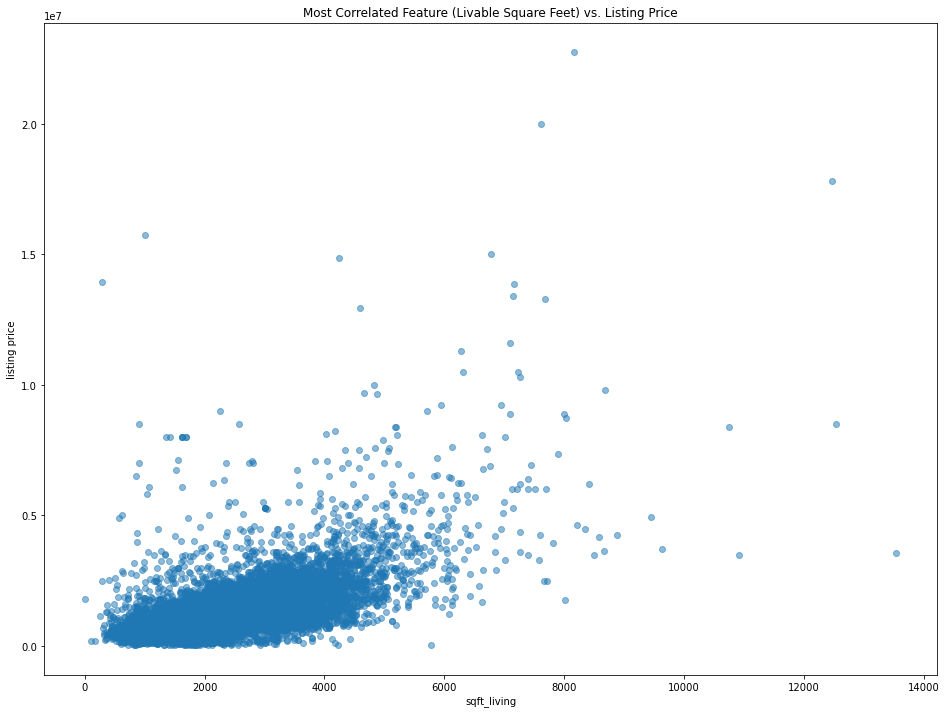

In [93]:
fig, ax = plt.subplots(figsize=(16, 12))

ax.scatter(X_train['sqft_living'], y_train, alpha=0.5)
ax.set_xlabel('sqft_living')
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature (Livable Square Feet) vs. Listing Price");

## BUILDING DUMMY REGRESSOR MODEL

In [94]:
baseline_model = LinearRegression()

In [95]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lm = LinearRegression().fit(X_train, y_train)

lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
lm_dummy_median = DummyRegressor(strategy = 'median').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)
y_predict_dummy_median = lm_dummy_median.predict(X_test)

In [96]:
#print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
  
print("Median absolute error (dummy): {:.2f}".format(median_absolute_error(y_test, y_predict_dummy_median)))
print("Median absolute error (linear model): {:.2f}".format(median_absolute_error(y_test, y_predict)))
  
print("r2_score (dummy mean): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (dummy median): {:.2f}".format(r2_score(y_test, y_predict_dummy_median)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

Mean squared error (dummy): 942578923521.72
Mean squared error (linear model): 528296919124.73
Median absolute error (dummy): 274001.00
Median absolute error (linear model): 236358.38
r2_score (dummy mean): -0.00
r2_score (dummy median): -0.07
r2_score (linear model): 0.44


In [97]:
X_train.shape

(22616, 12)

In [98]:
X_test.shape

(7539, 12)

In [99]:
836930600226.73 / 7539

111013476.61848123

In [100]:
df_clean['avg_price'] = df_clean['price'].mean()
X = df_clean['avg_price']
y = df_clean['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()

In [101]:
# Sanity check

dummy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                nan
Time:                        14:16:01   Log-Likelihood:            -4.5610e+05
No. Observations:               30155   AIC:                         9.122e+05
Df Residuals:                   30154   BIC:                         9.122e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.005    214.751      0.000       0.991       1.009
==============================================================================
Omnibus:                    37956.819   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14375871.818
Skew:                           6.603   Prob(JB):                         0.00
Kurtosis:                     109.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
ypred = dummy_model.predict(X)

In [103]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y, ypred)
rmse

896370.7961004516

## BUILDING FIRST MODEL

In [104]:
baseline_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[['sqft_living']],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.39703857095209055
Validation score: 0.3733333714211226


In [105]:
y = df_clean['price']
X = df_clean['sqft_living']

sm_baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
sm_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.773e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:16:01   Log-Likelihood:            -4.4912e+05
No. Observations:               30155   AIC:                         8.982e+05
Df Residuals:                   30153   BIC:                         8.983e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.443e+04   9782.728     -7.609      0.000   -9.36e+04   -5.53e+04
sqft_living   560.0050      4.206    133.160      0.000     551.762     568.248
==============================================================================
Omnibus:                    43429.367   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47159181.471
Skew:                           8.188   Prob(JB):                         0.00
Kurtosis:                     196.042   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## BUILDING MODEL WITH ALL FEATURES

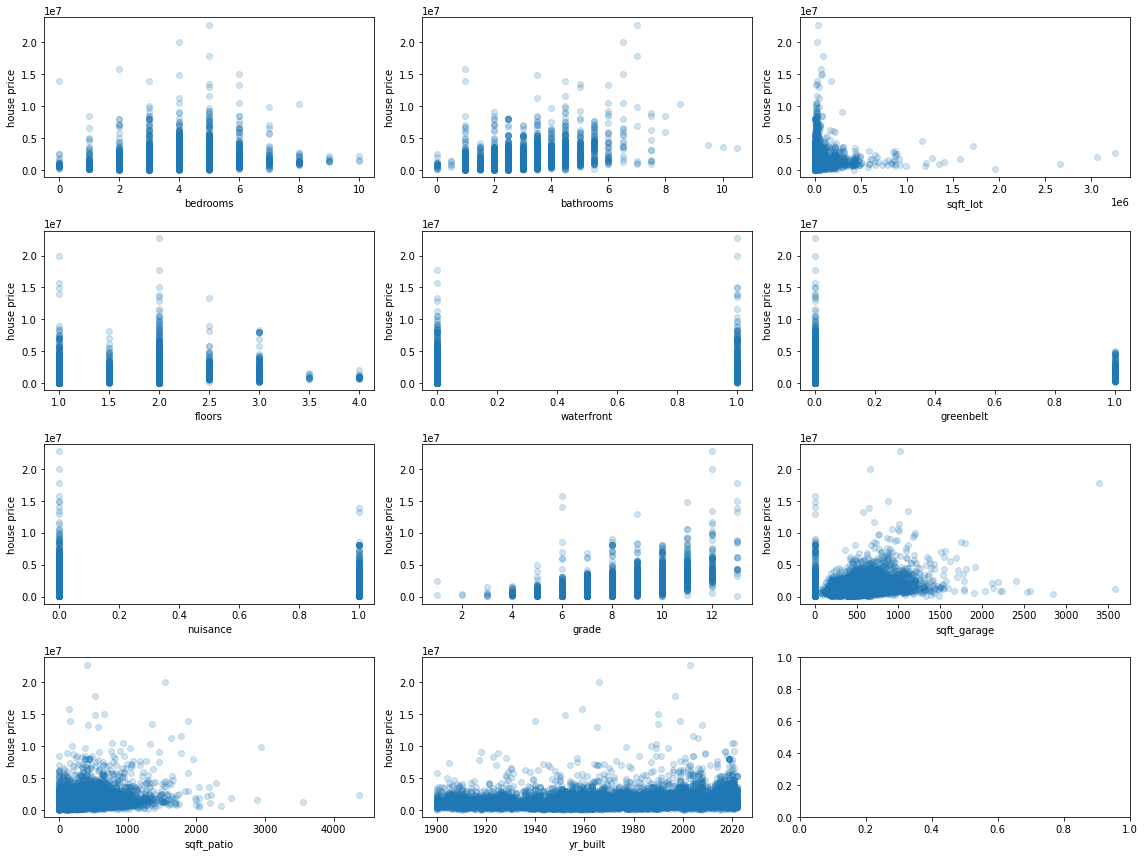

In [106]:
scatterplot_data = X_train.drop('sqft_living', axis=1)

fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(16, 12))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("house price")

## IDENTIFYING BEST COMBINATION OF FEATURES

In [107]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1839.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:16:04   Log-Likelihood:            -3.3369e+05
No. Observations:               22616   AIC:                         6.674e+05
Df Residuals:                   22603   BIC:                         6.675e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.242e+06   3.45e+05     23.873      0.000    7.57e+06    8.92e+06
bedrooms    -1.045e+05   5794.342    -18.043      0.000   -1.16e+05   -9.32e+04
bathrooms     8.97e+04   8212.310     10.922      0.000    7.36e+04    1.06e+05
sqft_living   387.8338      8.842     43.862      0.000     370.503     405.165
sqft_lot       -0.0426      0.066     -0.646      0.518      -0.172       0.087
floors      -4.594e+04   9467.403     -4.852      0.000   -6.45e+04   -2.74e+04
waterfront   1.061e+06   3.23e+04     32.810      0.000    9.97e+05    1.12e+06
greenbelt    3.919e+04   2.61e+04      1.499      0.134   -1.21e+04    9.04e+04
nuisance     4.858e+04   1.11e+04      4.385      0.000    2.69e+04    7.03e+04
grade        2.651e+05   5974.783     44.372      0.000    2.53e+05    2.77e+05
sqft_garage  -110.4272     18.920     -5.836      0.000    -147.512     -73.342
sqft_patio     91.5377     18.626      4.915      0.000      55.030     128.045
yr_built    -4950.0531    181.461    -27.279      0.000   -5305.729   -4594.377
==============================================================================
Omnibus:                    27088.655   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9708454.286
Skew:                           6.004   Prob(JB):                         0.00
Kurtosis:                     103.789   Cond. No.                     5.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df_clean_ord = df_clean.copy()

In [109]:
ord_enc = OrdinalEncoder()
ord_enc_f_t = ord_enc.fit_transform(df_clean[['bedrooms','bathrooms','floors','grade']])
ord_enc_df = pd.DataFrame(ord_enc_f_t, columns = ['bedrooms_ord','bathrooms_ord','floors_ord','grade_num_ord'], index=df_clean.index)

df_ord = pd.concat([df_clean, ord_enc_df], axis=1)


df_ord

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,grade,sqft_garage,sqft_patio,yr_built,avg_price,bedrooms_ord,bathrooms_ord,floors_ord,grade_num_ord
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,7,0,40,1969,1.108536e+06,4.0,2.0,0.0,6.0
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,7,0,240,1950,1.108536e+06,5.0,5.0,0.0,6.0
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,7,0,0,1956,1.108536e+06,6.0,4.0,0.0,6.0
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,9,200,270,2010,1.108536e+06,3.0,6.0,2.0,8.0
4,592500.0,2,2.0,1120,758,2.0,0,0,1,7,550,30,2012,1.108536e+06,2.0,4.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,0,0,0,8,0,210,1921,1.108536e+06,5.0,4.0,1.0,7.0
30151,1313000.0,3,2.0,2020,5800,2.0,0,0,0,7,0,520,2011,1.108536e+06,3.0,4.0,2.0,6.0
30152,800000.0,3,2.0,1620,3600,1.0,0,0,1,7,240,110,1995,1.108536e+06,3.0,4.0,0.0,6.0
30153,775000.0,3,2.5,2570,2889,2.0,0,0,0,8,480,100,2006,1.108536e+06,3.0,5.0,2.0,7.0


In [110]:
df_ord = df_ord.drop(['bedrooms','bathrooms','floors','grade'], axis=1)
df_ord

,price,sqft_living,sqft_lot,waterfront,greenbelt,nuisance,sqft_garage,sqft_patio,yr_built,avg_price,bedrooms_ord,bathrooms_ord,floors_ord,grade_num_ord
0,675000.0,1180,7140,0,0,0,0,40,1969,1.108536e+06,4.0,2.0,0.0,6.0
1,920000.0,2770,6703,0,0,1,0,240,1950,1.108536e+06,5.0,5.0,0.0,6.0
2,311000.0,2880,6156,0,0,0,0,0,1956,1.108536e+06,6.0,4.0,0.0,6.0
3,775000.0,2160,1400,0,0,0,200,270,2010,1.108536e+06,3.0,6.0,2.0,8.0
4,592500.0,1120,758,0,0,1,550,30,2012,1.108536e+06,2.0,4.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,1910,4000,0,0,0,0,210,1921,1.108536e+06,5.0,4.0,1.0,7.0
30151,1313000.0,2020,5800,0,0,0,0,520,2011,1.108536e+06,3.0,4.0,2.0,6.0
30152,800000.0,1620,3600,0,0,1,240,110,1995,1.108536e+06,3.0,4.0,0.0,6.0
30153,775000.0,2570,2889,0,0,0,480,100,2006,1.108536e+06,3.0,5.0,2.0,7.0


In [111]:
X_train = df_ord.drop(columns='price')
y_train = df_ord['price']

In [112]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2305.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:16:04   Log-Likelihood:            -4.4628e+05
No. Observations:               30155   AIC:                         8.926e+05
Df Residuals:                   30142   BIC:                         8.927e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     381.4876      7.998     47.695      0.000     365.810     397.165
sqft_lot         -0.0201      0.063     -0.317      0.751      -0.144       0.104
waterfront     1.129e+06   2.92e+04     38.621      0.000    1.07e+06    1.19e+06
greenbelt      4.689e+04   2.39e+04      1.962      0.050      40.006    9.37e+04
nuisance       6.243e+04   9984.854      6.253      0.000    4.29e+04     8.2e+04
sqft_garage    -152.2270     17.176     -8.863      0.000    -185.892    -118.562
sqft_patio      118.4129     16.924      6.997      0.000      85.241     151.584
yr_built      -4954.3083    164.331    -30.148      0.000   -5276.404   -4632.213
avg_price         7.5878      0.286     26.548      0.000       7.028       8.148
bedrooms_ord  -1.092e+05   5226.804    -20.901      0.000   -1.19e+05    -9.9e+04
bathrooms_ord  4.971e+04   3700.659     13.432      0.000    4.25e+04     5.7e+04
floors_ord    -2.603e+04   4284.385     -6.076      0.000   -3.44e+04   -1.76e+04
grade_num_ord  2.765e+05   5413.321     51.082      0.000    2.66e+05    2.87e+05
==============================================================================
Omnibus:                    43199.970   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49513596.624
Skew:                           8.074   Prob(JB):                         0.00
Kurtosis:                     200.855   Cond. No.                     8.70e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
baseline_model = LinearRegression()

In [114]:
X_train = df_clean.drop(columns='price')
y_train = df_clean['price']

most_correlated_feature = 'sqft_living'

In [115]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=1000)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.3658774160517941
Validation score: 0.3870364023686377


In [116]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
greenbelt: False
nuisance: True
grade: True
sqft_garage: True
sqft_patio: True
yr_built: True
avg_price: False


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [118]:
df_model = df[['price', 'bedrooms', 'bathrooms', 'grade', 'sqft_basement', 'sqft_garage', 'sqft_patio']]

In [119]:
df_model

,price,bedrooms,bathrooms,grade,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,7 Average,0,0,40
1,920000.0,5,2.5,7 Average,1570,0,240
2,311000.0,6,2.0,7 Average,1580,0,0
3,775000.0,3,3.0,9 Better,1070,200,270
4,592500.0,2,2.0,7 Average,550,550,30
...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,8 Good,1130,0,210
30151,1313000.0,3,2.0,7 Average,0,0,520
30152,800000.0,3,2.0,7 Average,920,240,110
30153,775000.0,3,2.5,8 Good,740,480,100


In [120]:
df_model['grade_num'] = df_model['grade'].str[:2].astype(np.int64)
df_model

<ipython-input-120-4a7c4f0cbd16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['grade_num'] = df_model['grade'].str[:2].astype(np.int64)


,price,bedrooms,bathrooms,grade,sqft_basement,sqft_garage,sqft_patio,grade_num
0,675000.0,4,1.0,7 Average,0,0,40,7
1,920000.0,5,2.5,7 Average,1570,0,240,7
2,311000.0,6,2.0,7 Average,1580,0,0,7
3,775000.0,3,3.0,9 Better,1070,200,270,9
4,592500.0,2,2.0,7 Average,550,550,30,7
...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,8 Good,1130,0,210,8
30151,1313000.0,3,2.0,7 Average,0,0,520,7
30152,800000.0,3,2.0,7 Average,920,240,110,7
30153,775000.0,3,2.5,8 Good,740,480,100,8


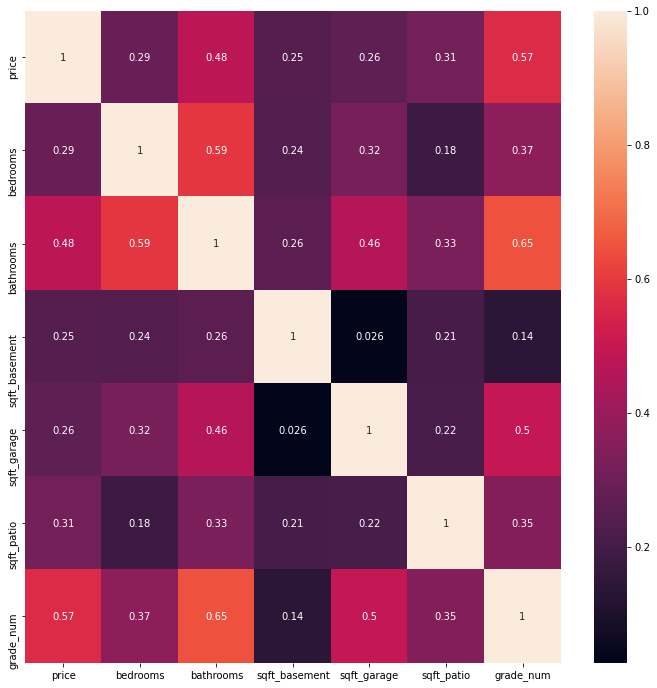

In [121]:
fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df_model.corr(), annot=True);

In [122]:
df_model.describe()

,price,bedrooms,bathrooms,sqft_basement,sqft_garage,sqft_patio,grade_num
count,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,476.039396,330.211142,217.412038,7.651368
std,8.963857e+05,0.981612,0.889556,579.631302,285.770536,245.302792,1.148978
min,2.736000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.480000e+05,3.000000,2.000000,0.000000,0.000000,40.000000,7.000000
50%,8.600000e+05,3.000000,2.500000,0.000000,400.000000,150.000000,8.000000
75%,1.300000e+06,4.000000,3.000000,940.000000,510.000000,320.000000,8.000000
max,3.075000e+07,13.000000,10.500000,8020.000000,3580.000000,4370.000000,13.000000


In [123]:
iqr = (df_model['price'].quantile(0.75) - df_model['price'].quantile(0.25))

upper = df_model['price'].quantile(0.75) + (1.5 * iqr)
lower = df_model['price'].quantile(0.25) - (1.5 * iqr)

iqr, upper, lower

(652000.0, 2278000.0, -330000.0)

In [124]:
df_model_iqr = df_model[df_model['price'] < upper]

In [125]:
df_model_iqr

,price,bedrooms,bathrooms,grade,sqft_basement,sqft_garage,sqft_patio,grade_num
0,675000.0,4,1.0,7 Average,0,0,40,7
1,920000.0,5,2.5,7 Average,1570,0,240,7
2,311000.0,6,2.0,7 Average,1580,0,0,7
3,775000.0,3,3.0,9 Better,1070,200,270,9
4,592500.0,2,2.0,7 Average,550,550,30,7
...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,8 Good,1130,0,210,8
30151,1313000.0,3,2.0,7 Average,0,0,520,7
30152,800000.0,3,2.0,7 Average,920,240,110,7
30153,775000.0,3,2.5,8 Good,740,480,100,8


In [126]:
bath_mean = df_model_iqr.groupby('bathrooms').mean()
bath_median = df_model_iqr.groupby('bathrooms').median()

bath_mean.reset_index(drop=False, inplace=True)
bath_median.reset_index(drop=False, inplace=True)

In [127]:
bath_median

,bathrooms,price,bedrooms,sqft_basement,sqft_garage,sqft_patio,grade_num
0,0.0,687500.0,0.0,0.0,0.0,0.0,7.0
1,0.5,925000.0,3.0,0.0,400.0,150.0,5.0
2,1.0,620000.0,3.0,0.0,0.0,40.0,7.0
3,1.5,677000.0,3.0,0.0,220.0,70.0,7.0
4,2.0,785000.0,3.0,360.0,200.0,150.0,7.0
5,2.5,875000.0,3.0,0.0,460.0,140.0,8.0
6,3.0,1020000.0,4.0,880.0,460.0,210.0,8.0
7,3.5,1268560.0,4.0,725.0,440.0,230.0,8.0
8,4.0,1444000.0,4.0,935.0,460.0,270.0,8.0
9,4.5,1600000.0,5.0,415.0,550.0,320.0,9.0


In [128]:
bath_mean

,bathrooms,price,bedrooms,sqft_basement,sqft_garage,sqft_patio,grade_num
0,0.0,7.253297e+05,0.433333,67.000000,110.000000,74.666667,6.300000
1,0.5,9.773900e+05,2.600000,0.000000,278.000000,225.600000,6.000000
2,1.0,6.731760e+05,2.546941,303.495913,108.762536,99.878507,6.452618
3,1.5,7.530506e+05,2.970291,400.585202,214.174327,141.493274,7.067265
4,2.0,8.520474e+05,3.154760,480.645019,224.375155,193.411496,7.260191
5,2.5,1.000200e+06,3.481096,292.566132,442.482075,216.851217,7.950936
6,3.0,1.116681e+06,4.039625,748.000261,405.790407,265.763816,7.858186
7,3.5,1.309154e+06,3.988162,696.783540,451.827508,294.704622,8.505637
8,4.0,1.420650e+06,4.668103,829.010776,426.189655,323.896552,8.420259
9,4.5,1.513952e+06,4.782407,691.620370,547.000000,398.638889,8.976852


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [130]:
bins = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']
bath_mean['bin'] = pd.cut(x = bath_mean['bathrooms'], bins = bins, labels = labels, include_lowest = True)

bath_mean_bin = bath_mean.groupby('bin').mean()

bath_mean_bin

,bathrooms,price,bedrooms,sqft_basement,sqft_garage,sqft_patio,grade_num
bin,,,,,,,
0-1,0.25,8.513598e+05,1.516667,33.500000,194.000000,150.133333,6.150000
1-2,1.25,7.131133e+05,2.758616,352.040558,161.468432,120.685890,6.759941
2-3,2.25,9.261236e+05,3.317928,386.605576,333.428615,205.131357,7.605563
3-4,3.25,1.212918e+06,4.013893,722.391900,428.808958,280.234219,8.181911
4-5,4.25,1.467301e+06,4.725255,760.315573,486.594828,361.267720,8.698555
5-6,5.25,1.352316e+06,5.298697,744.748449,602.786600,363.328784,8.946340
6-7,6.25,1.750163e+06,6.242105,895.026316,410.157895,347.000000,8.610526
7-8,7.25,1.290875e+06,7.750000,936.250000,446.250000,156.875000,7.875000


In [131]:
bath_mean_bin.reset_index(drop=False, inplace=True)

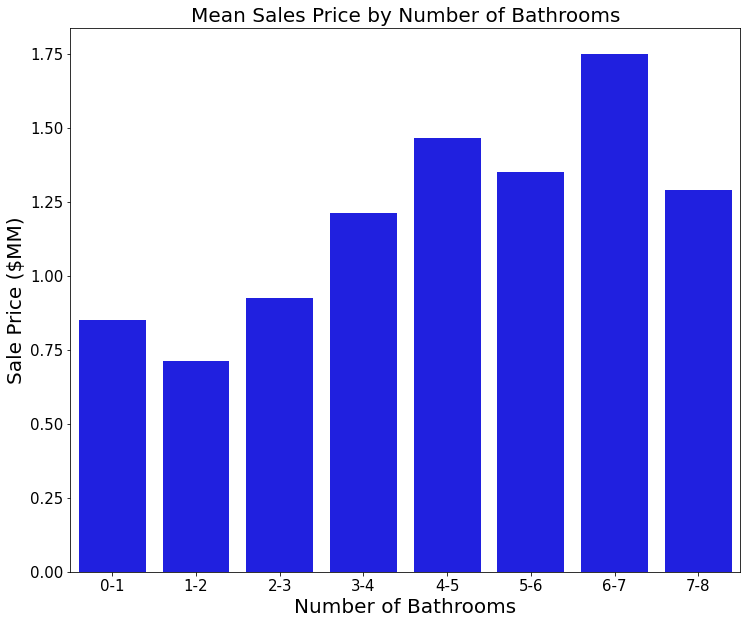

In [132]:
fig, ax = plt.subplots(figsize = (12 , 10))

y = bath_mean_bin['price'] / 1000000
ticklabels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']

fig = sns.barplot(data = bath_mean_bin,
                  x = 'bathrooms',
                  y = y,
                  color='blue')

plt.xlabel('Number of Bathrooms', size=20)
ax.set_xticklabels(ticklabels, size=15)
plt.ylabel('Sale Price ($MM)', size=20)
plt.yticks(fontsize=15)
plt.title('Mean Sales Price by Number of Bathrooms', size=20)
plt.show(fig);

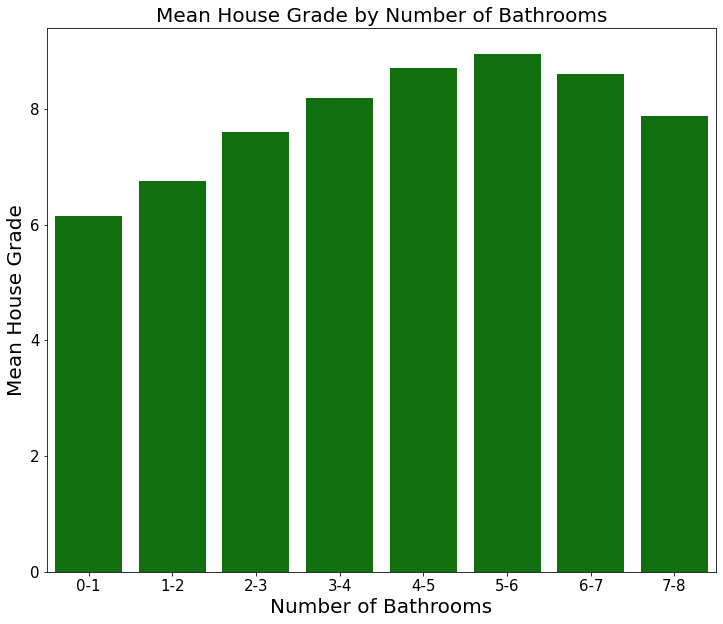

In [133]:
fig, ax = plt.subplots(figsize = (12 , 10))

y = bath_mean_bin['grade_num']
ticklabels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8']

fig = sns.barplot(data = bath_mean_bin,
                  x = 'bathrooms',
                  y = y,
                  color='green')

plt.xlabel('Number of Bathrooms', size=20)
ax.set_xticklabels(ticklabels, size=15)
plt.ylabel('Mean House Grade', size=20)
plt.yticks(fontsize=15)
plt.title('Mean House Grade by Number of Bathrooms', size=20)
plt.show(fig);

In [134]:
df_model_iqr['bathrooms'].value_counts()

2.5    8173
2.0    7237
1.0    4527
3.0    3836
1.5    1784
3.5    1774
4.0     464
4.5     216
5.0      52
5.5      31
0.0      30
6.0      19
6.5       5
0.5       5
7.0       4
7.5       4
Name: bathrooms, dtype: int64

In [135]:
df_model_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28161 entries, 0 to 30154
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          28161 non-null  float64
 1   bedrooms       28161 non-null  int64  
 2   bathrooms      28161 non-null  float64
 3   grade          28161 non-null  object 
 4   sqft_basement  28161 non-null  int64  
 5   sqft_garage    28161 non-null  int64  
 6   sqft_patio     28161 non-null  int64  
 7   grade_num      28161 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.9+ MB


In [136]:
X = df_model_iqr.drop(['price', 'grade'], axis=1)
y = df_model_iqr['price']

In [137]:
model = sm.OLS(endog=y, exog=sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     2473.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:16:06   Log-Likelihood:            -3.9961e+05
No. Observations:               28161   AIC:                         7.992e+05
Df Residuals:                   28154   BIC:                         7.993e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.262e+05   1.79e+04    -46.084      0.000   -8.61e+05   -7.91e+05
bedrooms       4.342e+04   2685.235     16.169      0.000    3.82e+04    4.87e+04
bathrooms      5.134e+04   3789.877     13.546      0.000    4.39e+04    5.88e+04
sqft_basement   102.9370      4.062     25.341      0.000      94.975     110.899
sqft_garage     -67.8455      8.962     -7.570      0.000     -85.412     -50.279
sqft_patio      127.8549      9.814     13.028      0.000     108.619     147.091
grade_num      1.937e+05   2718.606     71.243      0.000    1.88e+05    1.99e+05
==============================================================================
Omnibus:                     2095.242   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2865.677
Skew:                           0.642   Prob(JB):                         0.00
Kurtosis:                       3.891   Cond. No.                     6.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

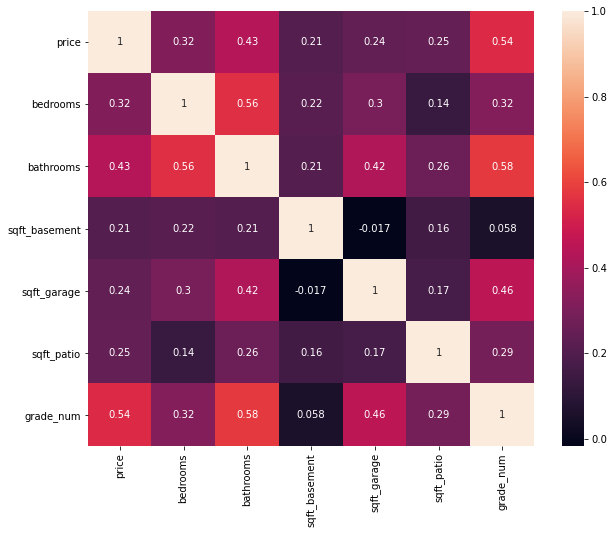

In [138]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df_model_iqr.corr(), annot=True);

In [139]:
df_model_iqr.corr()

,price,bedrooms,bathrooms,sqft_basement,sqft_garage,sqft_patio,grade_num
price,1.000000,0.316549,0.433948,0.206006,0.238916,0.245572,0.539910
bedrooms,0.316549,1.000000,0.558958,0.216751,0.296896,0.137610,0.322508
bathrooms,0.433948,0.558958,1.000000,0.207312,0.422365,0.264228,0.581847
sqft_basement,0.206006,0.216751,0.207312,1.000000,-0.016691,0.160846,0.058459
sqft_garage,0.238916,0.296896,0.422365,-0.016691,1.000000,0.172210,0.456079
sqft_patio,0.245572,0.137610,0.264228,0.160846,0.172210,1.000000,0.285214
grade_num,0.539910,0.322508,0.581847,0.058459,0.456079,0.285214,1.000000


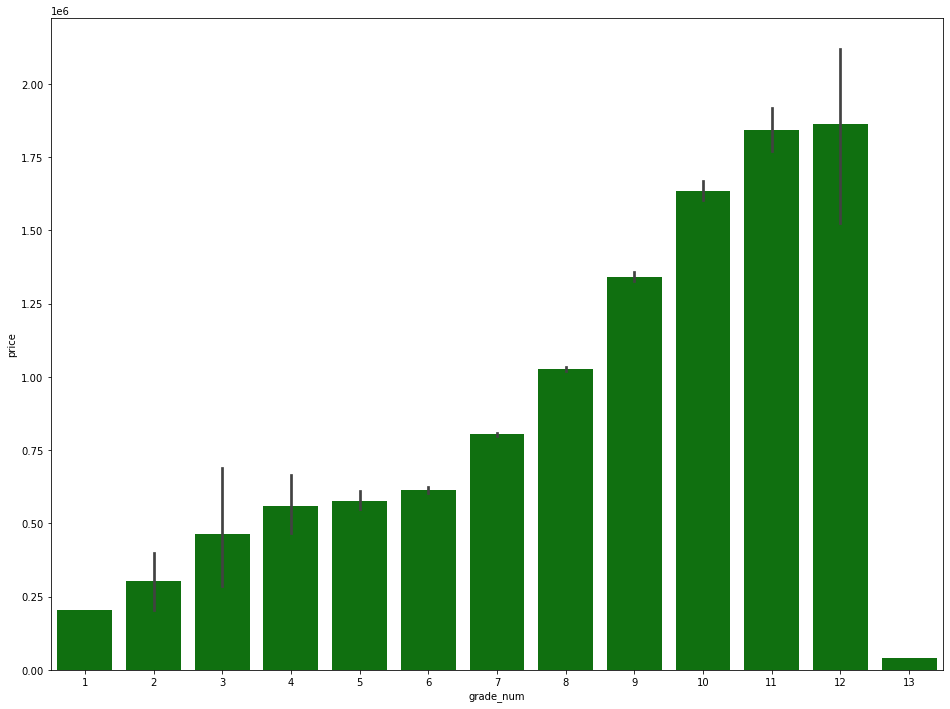

In [140]:
fig, ax = plt.subplots(figsize=(16, 12))

fig = sns.barplot(data = df_model_iqr,
                  x = 'grade_num',
                  y = 'price',
                  color='green')

In [142]:
test = df_model_iqr[df_model_iqr['bathrooms'] >= 7]

test

,price,bedrooms,bathrooms,grade,sqft_basement,sqft_garage,sqft_patio,grade_num
657,1450000.0,8,7.5,8 Good,1510,520,110,8
1949,1100000.0,7,7.0,7 Average,1900,0,0,7
7950,945000.0,6,7.5,7 Average,0,1490,0,7
9707,1700000.0,6,7.0,10 Very Good,1690,500,580,10
21296,907000.0,6,7.0,7 Average,920,510,0,7
21623,1350000.0,9,7.5,7 Average,1470,550,70,7
24101,1375000.0,10,7.0,9 Better,0,0,480,9
25484,1500000.0,10,7.5,8 Good,0,0,15,8
